# Multimethod Binarization demonstration
## Using multiple binary images and CCA to isolate characters from an image

In [1]:
import cv2
import multibin as mb

from utils import cs_utils

from matplotlib import pyplot as plt
from IPython.display import display

### Define binarization methods to be applied. 

#### You can use as many instances as you want, just be aware of the accuracy/performance trade-off.
#### Each method is a dictionary following the format:
    
    {
    'type' : Binarization method,
    'window_size': Moving square window dimension,
    'k_factor': Constant
    }

#### You can read more about each of them on the paper that inspired this code (see README) 

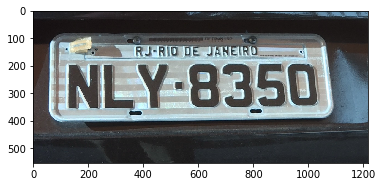

In [3]:
bin_methods = [{
    'type': 'wolf',
    'window_size': 11,
    'k_factor': 0.2
},
    {
    'type': 'niblack',
    'window_size': 61,
    'k_factor': 0.2
},
    {
    'type': 'niblack',
    'window_size': 11,
    'k_factor': 0.4
},
    {
    'type': 'sauvola',
    'window_size': 31,
    'k_factor': 0.4
}]

# Sample image
img_path = 'test/testplate.jpg'
img = cv2.imread(img_path)
plt.imshow(img)

### Obtain 4 different binary images using the defined methods
#### Optional arguments:
* **resize**: Resize input image to desired output dimensions;
* **morph_kernel**: Define a morphological kernel to be used in opening image to reduce noise (see: [link]);
* **return_original**: Return a copy of the original image resized to output dimensions as the first position in the resulting array;

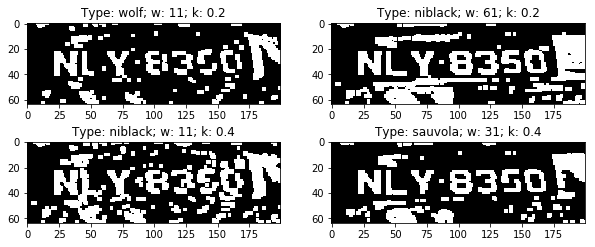

In [5]:
KERNEL = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
RESIZE = (200,64)

bin_imgs = mb.binarize(img, bin_methods, resize=RESIZE, morph_kernel=KERNEL, return_original=True)
original_img = bin_imgs[0]


fig=plt.figure(figsize=(10, 4))
cols = 2
rows = 2
plot_idx = 1
for idx, bin_img in enumerate(bin_imgs[1:]):
    title = "Type: {}; w: {}; k: {}".format(bin_methods[idx]['type'], bin_methods[idx]['window_size'], bin_methods[idx]['k_factor'])
    fig.add_subplot(rows, cols, plot_idx, title=title)
    plt.imshow(bin_img, cmap='gray')
    plot_idx += 1                      
plt.show()

### Use CCA Analysis to find possible ROIs in binary images
#### We can see that different methods yield different candidates. Some are more sensitive to some visual features than others.

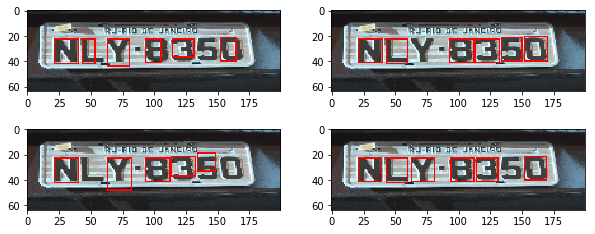

In [6]:
fig=plt.figure(figsize=(10, 4))
cols = 2
rows = 2
plot_idx = 1

candidate_boxes = []
candidate_centroids = []

for bin_img in bin_imgs[1:]:
    plot_img = original_img.copy()
    # Select regions based on each input
    boxes, centroids = cs_utils.get_candidate_regions(bin_img)
    candidate_boxes += boxes
    candidate_centroids += centroids

    plot_img = cs_utils.plot_blobs(plot_img, boxes)        
    fig.add_subplot(rows, cols, plot_idx)
    plt.imshow(plot_img, cmap='gray')
    plot_idx += 1                      
plt.show()

### Visualize all detected candidate regions combined.
#### All characters are properly detected
Obs: Optional arguments `plot_line` and `centroids` can be used together to plot a line across blob centroids using the Least Squares method. The idea is that this can be used to further eliminate outliers among the ROIs by calculating their distance from the line.

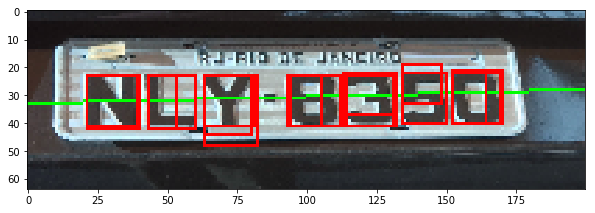

In [7]:
fig=plt.figure(figsize=(10, 4))
plot_img = original_img.copy()

cs_utils.plot_blobs(plot_img, candidate_boxes, plot_line=True, centroids=candidate_centroids)  
plt.imshow(plot_img)